# Neural Network


We create a neural network with only **70 lines of code** (orignal code can be found in network.py).
Notice how we only import numpy (for better matrix operations) and dont use any other third-party libaries.

Fig 1:
![Example Neural Network](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

In [5]:
"""
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""
import random
import numpy as np

class Network(object):

    def __init__(self, sizes, biases=None, weights=None,):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers.
        For a [2, 3, 1] network we get a [len3,len1] array for biases
        And for weights we get a [len3[len2],len3] array.
        Think of incoming connections!
        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = biases if biases != None else [
            np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = weights if weights != None else [np.random.randn(y, x)
                                                      for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)
        classification_rates = []
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                classification_rates.append(self.evaluate(test_data) / n_test)
                print(f"Epoch {j} : {self.evaluate(test_data)} / {n_test}")
            else:
                print(f"Epoch {j} complete")


    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]  # list to store all the activations, layer by layer
        zs = []  # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


Now we execute the load in 60.000 handwritten digits from the MINST Database as our training data.
Our training data has the shape of a list of tuples like such: (28x28 pixel image, digit values from 0-9) mnist_loader.py goes more in depth on the data.

Here's a few images from MNIST: ![images](http://neuralnetworksanddeeplearning.com/images/digits_separate.png)

As shown in Fig.1, for the structure of our neurons we choose a *781x30x10* network. 781 because of the 28x28 = 781 input image, 10 for the result numbers and 30 without any particular reason. 


After each epoch we test the accuray of our network with a set of 10.000 training data. One can adjust the given parameters further. I am using matplotlip to plot the result.

first_number as a 1x10 vector [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


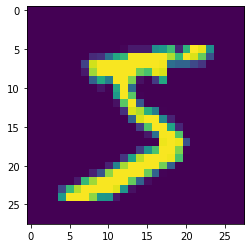

In [6]:
# Import hack, see: https://stackoverflow.com/questions/6323860/sibling-package-imports
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from neuralnets import mnist_loader

import matplotlib.pyplot as plt
import numpy as np

# Getting the training and test data
training_data, _, test_data = mnist_loader.load_data_wrapper()

# You can read more about the shape of the mnist image data in mnist_loader 
# But basically we the ``training_data`` is as a tuple with two entries.
# The first entry contains the actual training images in form of a 28 x 28 numpy ndarray.
# The second entry is a numpy ndarray with just the digit values (0...9) for the corresponding images 

training_data_list = list(training_data)
first_image = training_data_list[0][0]
first_number = training_data_list[0][1]

print("first_number as a 1x10 vector", first_number)

# Converting the image to its original shape as we transformed it to a 1x787 vector 
# for the input layer
image = np.array(first_image).reshape(28,28)
plt.imshow(image)
plt.show()

In [7]:
# Import hack, see: https://stackoverflow.com/questions/6323860/sibling-package-imports
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from neuralnets import mnist_loader
# Getting the training and test data
training_data, _, test_data = mnist_loader.load_data_wrapper()
# Constructing the network
net = Network([784, 30, 10])

epochs = 10
learning_rate = 2.0
mini_batch_size = 10
print(f"Now starting the learning, of {epochs} epochs, this may take a while")
net.SGD(training_data=training_data, epochs=epochs, mini_batch_size=mini_batch_size, eta=learning_rate, test_data=test_data)

Now starting the learning, of 10 epochs, this may take a while
Epoch 0 : 8008 / 10000
Epoch 1 : 8259 / 10000
Epoch 2 : 8300 / 10000
Epoch 3 : 8364 / 10000
Epoch 4 : 8383 / 10000
Epoch 5 : 8417 / 10000
Epoch 6 : 8446 / 10000
Epoch 7 : 8436 / 10000
Epoch 8 : 9343 / 10000
Epoch 9 : 9393 / 10000


**But how do these external parameters like the learning rate and the structure of the network influence its Classification rate?**

In order to visualize the differences, I have ploted 3 different networks with the code below.

![alt](../../images/networks_comparison.png)

(Note that green has a structure of [784,10], as shown below

Note that, as we initialize the network randomly, your results will differ from mine. To give all networks "the same start", one would have to extract the weights and biases upon initialization (shallow copying) and then pass it into each new initialization.

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from neuralnets import mnist_loader, network, plot


# This is how we define multiple networks for comparison
networks = [
    {
        'sizes': [784, 30, 10],
        'epochs': 2,
        'mini_batch_size': 10,
        'learning_rate': 2.0,
    },
    {
        'sizes': [784, 30, 10],
        'epochs': 25,
        'mini_batch_size': 10,
        'learning_rate': 2.5,
    },
    {
        'sizes': [784, 10],
        'epochs': 25,
        'mini_batch_size': 10,
        'learning_rate': 2.5,
    },
]

print("Plotting the networks now, this may take a while")


def plot_networks(networks):
    plot_data = []
    for network_data in networks:
        print("network data", network_data)
        # Reloading on each iteration because of EOF issues with training_data
        training_data, _, test_data = mnist_loader.load_data_wrapper()
        net = network.Network(network_data['sizes'])
        cr = net.SGD(training_data=training_data, epochs=network_data['epochs'], mini_batch_size=network_data[
                     'mini_batch_size'], eta=network_data['learning_rate'], test_data=test_data)
        plot_data.append(
            (network_data['epochs'], cr, network_data['learning_rate']))

    # Now we plot the classification results of all network
    plot.plot_learning_rate(plot_data, xlabel="epochs", ylabel="Correct Classifications %",
         title='Training Model output')


plot_networks(networks)

Plotting the networks now, this may take a while
network data {'sizes': [784, 30, 10], 'epochs': 2, 'mini_batch_size': 10, 'learning_rate': 2.0}
Epoch 0 : 9074 / 10000
Epoch 1 : 9268 / 10000
network data {'sizes': [784, 30, 10], 'epochs': 25, 'mini_batch_size': 10, 'learning_rate': 2.5}
Epoch 0 : 8993 / 10000
Epoch 1 : 9104 / 10000
Epoch 2 : 9203 / 10000
Epoch 3 : 9253 / 10000
Epoch 4 : 9316 / 10000
Epoch 5 : 9320 / 10000
Epoch 6 : 9337 / 10000
Epoch 7 : 9382 / 10000
Epoch 8 : 9395 / 10000
Epoch 9 : 9379 / 10000
Epoch 10 : 9426 / 10000
Epoch 11 : 9412 / 10000
Epoch 12 : 9421 / 10000
Epoch 13 : 9425 / 10000
Epoch 14 : 9464 / 10000
Epoch 15 : 9457 / 10000
Epoch 16 : 9447 / 10000
Epoch 17 : 9450 / 10000
Epoch 18 : 9451 / 10000
Epoch 19 : 9458 / 10000
Epoch 20 : 9465 / 10000


# Key findings


## About the learning rate
When thinking of the gradient descent apllied in the `backprop` function in a 3-D space, one can image a ball rolling down to a minimum. Then it becomes aparent why a low learning rate approaches a good classification rate  very slowly while a high rate "overshoots" it at times, leading to a slightly lower classification rate.
Illustration:

![ball](http://neuralnetworksanddeeplearning.com/images/valley_with_ball.png)

At the end of the day, all our network is doing at each iteration is not minimize this cost function via Gradient descent

$$ΔC≈∇C⋅Δv$$

You can read more about it [here](http://neuralnetworksanddeeplearning.com/chap1.html#learning_with_gradient_descent)

## About the structure

I find it actually surprising that a network without any hidden layers performs so well [784 x 10]. Yet I will still have to dig deeper into why.

## About weights and biases

It finally became apparent to me what people mean when they speak of networks being trained. When saving the weights and biases and initializing a new network with them it will start where it left of.

## About the results

I think 95% is already a great start, given the small amount of code used. For comparison: Random results are 10%, counting the darkness levels gets around 50& and Support vector machines get up to 98.5% for the same problem set. 
As SVMs are far easier to implement, we should definately keep them in mind.
Modern CCN Networks get a classification rate as high as 99.979 % for the same dataset. But our network has already performed quite well. 

After all some of the images are even hard for humans to identify: ![hard_images](http://neuralnetworksanddeeplearning.com/images/mnist_really_bad_images.png)

To learn more about how to interpret these results, as well as how the network internally works, I recommend this video:

[![3b1bT](http://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=aircAruvnKk)

## Closing thoughts

A interesting observation here is that:

**sophisticated algorithm ≤ simple learning algorithm + good training data**

One thought that came to mind is the following:

Why couldnt we just calculate differentials and then make adjustments for all the **external parameters** (e.g. learning rate, structure), similarly to how it is done for the internal parameters of weights and biases via the Gradient descent? 

This way one could theoretically optimize all parameters associated with a network and get the highest classification rate.